In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
lic_data = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_russian_plate_number.xml')

In [2]:
def plt_show(image, title="", gray=False, size=(100,100)):
    temp=image
    if gray==False:
        temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        plt.title(title)
        plt.imshow(temp, cmap='gray')
        plt.show()
        

In [3]:
def detect_number(img):
    temp=img
    gray=cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    number=lic_data.detectMultiScale(img,1.2)
    print("number plate detected: "+str(len(number)))
    for numbers in number:
        (x,y,w,h)=numbers
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+h]
        cv2.rectangle(temp, (x,y), (x+w, y+h), (0,255,0), 3)
    plt_show(temp)

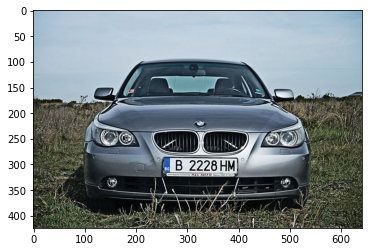

number plate detected: 1


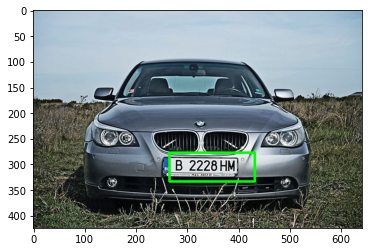

In [4]:
img=cv2.imread("car1.jpg")
plt_show(img)
detect_number(img)

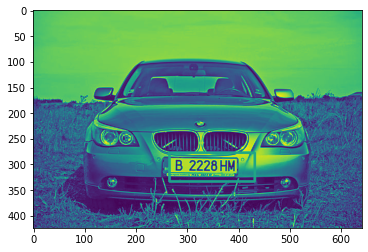

In [5]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

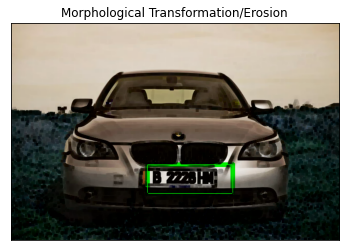

In [6]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(1,1,1), plt.imshow(erosion)
plt.title('Morphological Transformation/Erosion'), plt.xticks([]), plt.yticks([])
plt.show()


STEP 1: Edge Detection


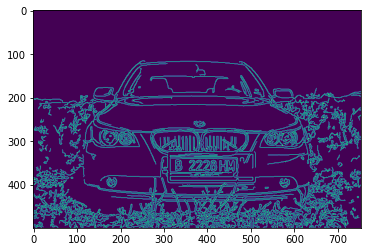

In [7]:
import imutils
image = img
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
plt.imshow(image)
plt.imshow(edged)

In [8]:
img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

In [9]:
gray = cv2.bilateralFilter(gray, 13, 15, 15)


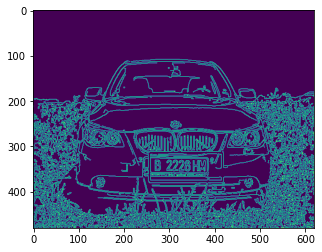

In [10]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
plt.imshow(edged)

In [11]:
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [12]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [13]:
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

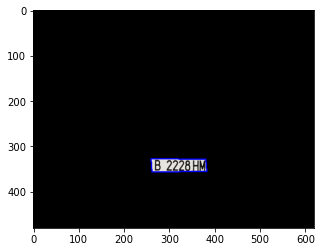

In [14]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,150,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image)


In [15]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

ValueError: zero-size array to reduction operation minimum which has no identity

In [16]:
plt.imshow(Cropped, cmap = 'gray');

NameError: name 'Cropped' is not defined

In [17]:
#Read the number plate
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected license plate Number is:",text)

NameError: name 'Cropped' is not defined

In [ ]:
import requests

In [ ]:
import pprint

In [ ]:
r=requests.get(   r = requests.get(f"http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={number}&username={user}"))
obj=r.json()

In [ ]:
#pprint.pprint(r.json())
val=obj[1]
print(val['VechileIdentificationNumber'])
